In [106]:
# Additional libraries installs
%pip install missingno

In [107]:
#Import Libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as sns
import missingno as msno
import warnings


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


In [108]:
# Load Twitter data
df = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv', low_memory=False)

In [109]:
# Check data dimensions
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Rows:  8529
Columns:  147


In [110]:
# Examine first two observations
df.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 10:57 am,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429829567946759,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1,445,445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"345,718",3.6%,NaN,16,4,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,NaN,NaN,NaN,9,9,1,0.0,7,1.0,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB 

## Data Cleaning

### Drop Columns

The plan is to drop columns in which atleast 80% of the data are null values.

These columns cannot be used in the analysis

In [111]:
# Return columns where null values are >= 80%
null_columns = list(df.columns[df.isnull().sum() >= 0.8*len(df)])

In [112]:
# Get the columns that are not completely null
not_null_columns = df.columns[~df.columns.isin(null_columns)]

# Create a new dataframe with only the non-null columns
df_not_null = df[not_null_columns]

In [113]:
# Check new dataframe dimensions
print('Rows: ', df_not_null.shape[0])
print('Columns: ', df_not_null.shape[1])

Rows:  8529
Columns:  34


In [114]:
# Examine first two observations
df_not_null.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,7/13/2023 10:57 am,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429829567946759,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1,445,445,"345,718",3.6%,16,4,4,2.0,1,NaN,NaN,9,9,1,0.0,7,1.0,0,0.0,0.0,0.0,0.0,0.0,1
1,7/12/2023 8:03 pm,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204777081864192,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE",NaN,"2,961","2,961","347,102",1.76%,52,11,11,20.0,3,NaN,NaN,18,18,NaN,1.0,12,5.0,0,0.0,0.0,0.0,0.0,0.0,NaN


In [115]:
# print column names 
print(df_not_null.columns)

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Potential Reach',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Other Post Clicks', 'Post Clicks (All)', 'Post Media Clicks',
       'Post Hashtag Clicks', 'Post Detail Expand Clicks', 'Profile Clicks',
       'Other Engagements', 'App Engagements', 'App Install Attempts',
       'App Opens', 'Follows from Post', 'Unfollows from Post', 'Media Views'],
      dtype='object')


### Quality Issues 

The plan is to examine the data for
* duplicates
* wrong data types
* inconsistent / wrong formatting and
* missing data

In [116]:
# Check duplicates
print('Number of duplicates: ', df_not_null.duplicated().sum())

Number of duplicates:  0


In [117]:
# Examine datatypes
pd.DataFrame(df_not_null.dtypes)

,0
Date,object
Post ID,int64
Network,object
Post Type,object
Content Type,object
Profile,object
Sent by,object
Link,object
Post,object
Linked Content,object


In [118]:
# Check missing values
pd.DataFrame(df_not_null.isna().sum()).sort_values(by=0, ascending=False)

,0
Click-Through Rate,4916
Post Link Clicks,4916
Linked Content,3551
Post Hashtag Clicks,2632
Post Media Clicks,1836
Media Views,1831
Engagement Rate (per Impression),688
Follows from Post,687
App Opens,687
App Install Attempts,687


#### List of Quality Issues

* 'Engagement Rate (per Impression)' & 'Click-Through Rate' columns have % sign values
* Several columns have the wrong datatype
    * 15 columns are wrongly labeled as strings instead of numerics.
    * The Date column should be a datetime object
    * 'Sent by' and 'Content Type' columns should be categorical


* Several columns have values are formatted with ',' e.g. '200,000'. This format cannot be converted to numeric without issues. They must be treated while converting datatypes.
* Several columns have missing values
* 'Sent by' column has blank values (i.e missing values are filled with space).
---

#### Fix issues with Engagement Rate (per impression) and 'Click-Through Rate' formatting

In [119]:
# Remove % sign from 'Engagement Rate (per Impression)', 'Click-Through Rate' columns
df_not_null['Engagement Rate (per Impression)'] = df_not_null['Engagement Rate (per Impression)'].str.replace('%', '')
df_not_null['Click-Through Rate'] = df_not_null['Click-Through Rate'].str.replace('%', '')

In [120]:
# Confirm changes
df_not_null[['Engagement Rate (per Impression)', 'Click-Through Rate']].head()

,Engagement Rate (per Impression),Click-Through Rate
0,3.6,NaN
1,1.76,NaN
2,4.24,0.82
3,3.4,NaN
4,1.52,NaN


---
#### Fix issues with wrong data types

In [121]:
# convert "Date" column to datetime
df_not_null['Date'] = pd.to_datetime(df_not_null['Date'])

In [122]:
# Columns to be converted to numeric
numeric_columns = ['Impressions', 'Organic Impressions', 'Potential Reach',
                    'Engagement Rate (per Impression)', 'Engagements', 'Reactions',
                    'Likes', 'Shares', 'Click-Through Rate', 'Other Post Clicks',
                    'Post Clicks (All)', 'Post Media Clicks', 'Post Detail Expand Clicks',
                    'Other Engagements', 'Media Views']

In [123]:
# Convert columns to numeric data type
df_not_null[numeric_columns] = df_not_null[numeric_columns].applymap(lambda x: float(str(x).replace(',', '')))

In [124]:
# Convert 'Sent by' and 'Content type' columns to categorical data type
df_not_null['Sent by'] = df_not_null['Sent by'].astype('category')
df_not_null['Content Type'] = df_not_null['Content Type'].astype('category')

In [125]:
# Examine datatypes
pd.DataFrame(df_not_null.dtypes)

,0
Date,datetime64[ns]
Post ID,int64
Network,object
Post Type,object
Content Type,category
Profile,object
Sent by,category
Link,object
Post,object
Linked Content,object


---

#### Fix issues with 'Sent by' blank spaces

In [126]:
pd.DataFrame(df_not_null['Sent by'].value_counts())

,Sent by
,4240
Sophia Amuka,3250
Aramide Salami,541
Blessing Ubah,251
Kemi Amoo,92
Dunni Ogunsanya,76
Damilare Oyekanmi,71
Patience Nnaji,3
Lilian Ibekwe,2
Kanayo Obiano,1


In [127]:
# Replace blank space with 'Other' in 'Sent by' column
df_not_null['Sent by'] = df_not_null['Sent by'].replace(' ', 'Other')

In [128]:
# Confirm changes
pd.DataFrame(df_not_null['Sent by'].value_counts())

,Sent by
Other,4240
Sophia Amuka,3250
Aramide Salami,541
Blessing Ubah,251
Kemi Amoo,92
Dunni Ogunsanya,76
Damilare Oyekanmi,71
Patience Nnaji,3
Lilian Ibekwe,2
Kanayo Obiano,1


---
#### Fix issues with missing values

##### Missing data heatmap

*"The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:"* [Missingno heatmap](https://github.com/ResidentMario/missingno#heatmap)

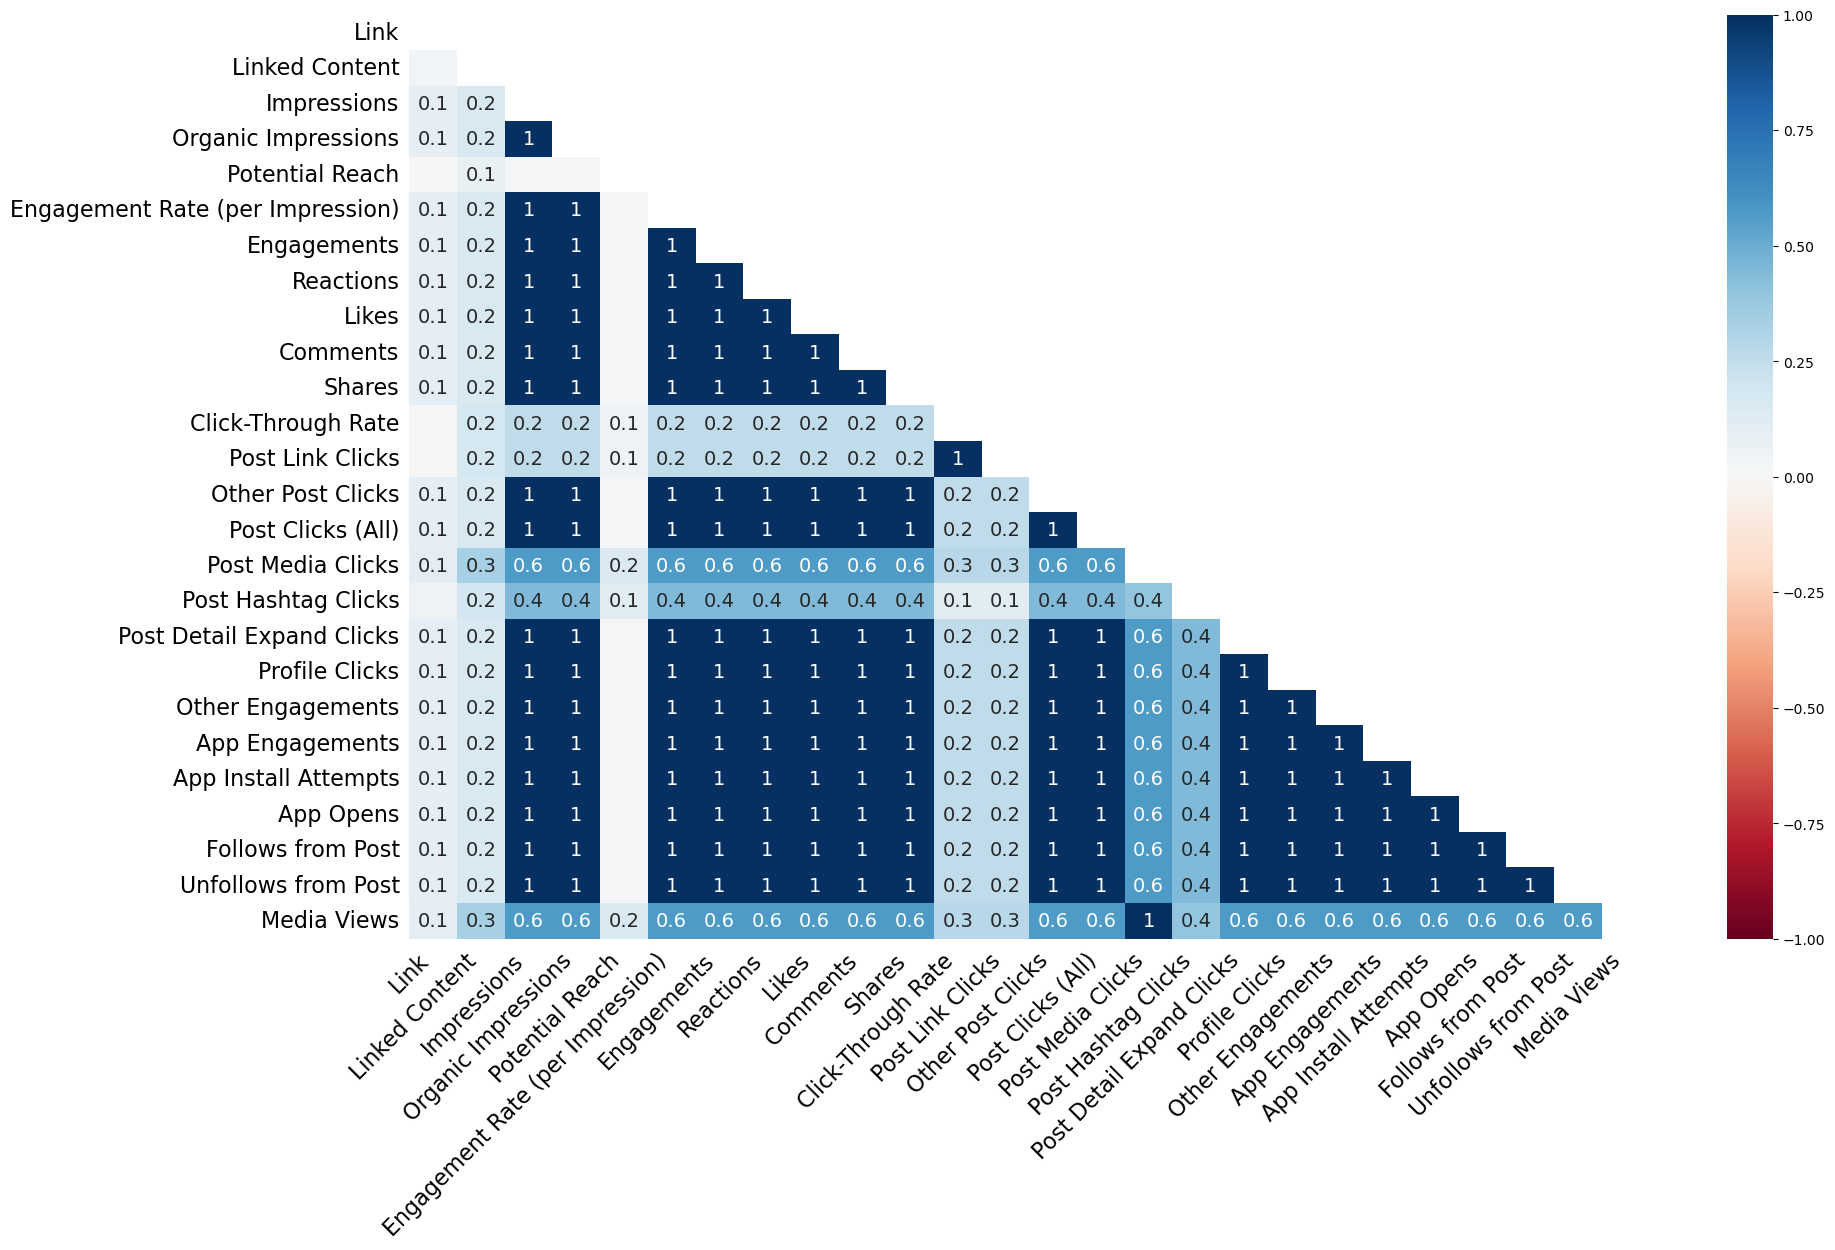

In [129]:
# Create a missing data heatmap
msno.heatmap(df_not_null);

In [130]:
# Check rows where impressions is null
df_not_null[df_not_null['Impressions'].isnull()].head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
38,2023-07-05 11:02:00,1676531875987456005,Twitter,Tweet,Link,'@StanbicIBTC,Other,https://twitter.com/StanbicIBTC/status/1676531875987456005,Ladies At The Table Series (LATTES) 3.0 https://t.co/AfVdW0hewh,https://twitter.com/i/broadcasts/1MYGNgnAOkwJw,NaN,NaN,346917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2023-07-03 12:13:00,1675825209150930944,Twitter,Tweet,Photo,'@StanbicIBTC,Other,https://twitter.com/StanbicIBTC/status/1675825209150930944,"Driving growth beyond borders is what we do.\nNALMACO, a leading food processing company and other clients of Stanbic IBTC are currently exhibiting produce at the third biennial China-Africa Economic and Trade Expo (CAETE) through our parent group, Standard Bank. The expo aims to… https://t.co/S7UWnePDu4","https://twitter.com/StanbicIBTC/status/1675825209150930944/photo/1, https://twitter.com/StanbicIBTC/status/1675825209150930944/photo/1, https://twitter.com/StanbicIBTC/status/1675825209150930944/photo/1, https://twitter.com/StanbicIBTC/status/1675825209150930944/photo/1",NaN,NaN,345482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Note:

On careful examination, posts with no impressions correspond to deleted tweets. <br>
This also extends to other columns with a correlation score of 1 in the above heatmap<br> 
The observations will be dropped. 

In [131]:
# Drop rows where impressions are NaN or 0
df_not_null = df_not_null[(df_not_null['Impressions'].notna()) & (df_not_null['Impressions'] != 0)]

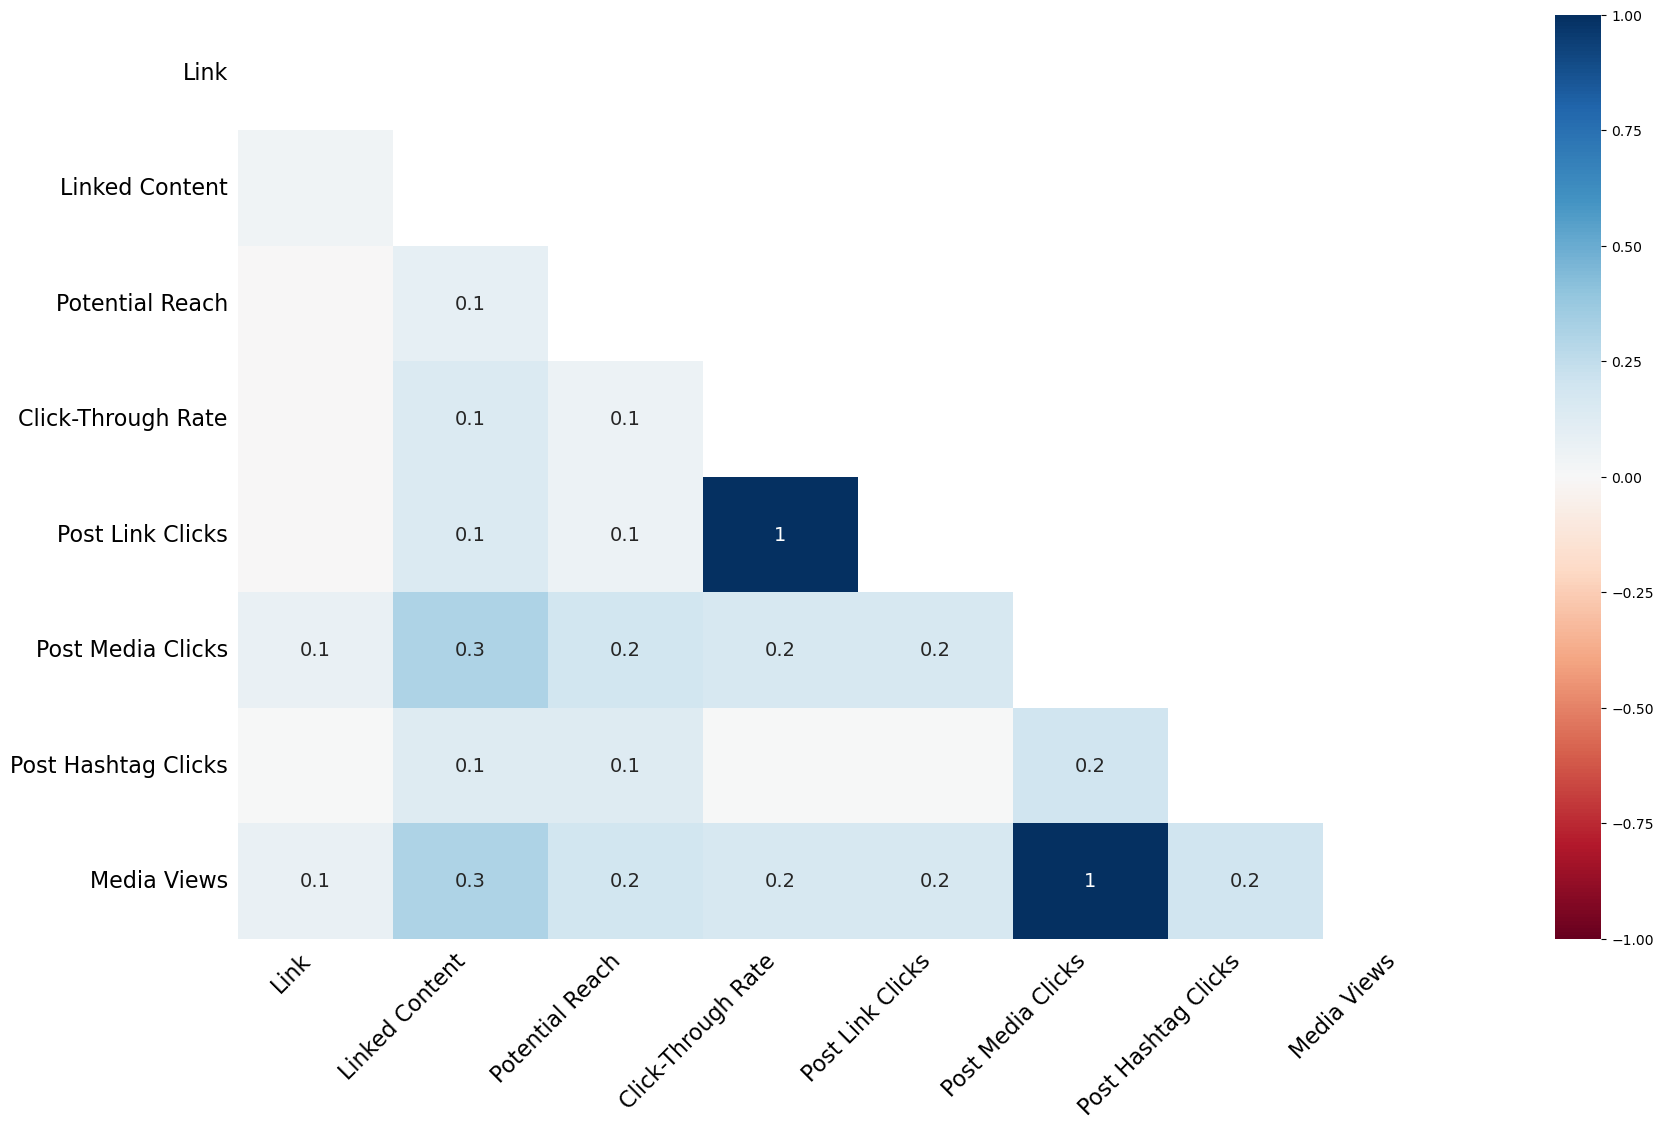

In [132]:
# Check updated missing data heatmap
msno.heatmap(df_not_null);

##### Note:

As seen above, every "Post Link Click" is associated with the Click-Through Rate (CTR)
$$CTR = \frac{Post Link Clicks}{Impressions} \times 100\%$$

From Twitter's glossary, *"Post Link Clicks" is the number of times people clicked on the links in tweets published by an account during the time frame.*

On further examination, observations with null *"Post Link Clicks"* correspond to posts without links.

However, some posts with external links have *"Post Link Clicks"* of 0 so it might be difficult to just impute missing values with 0.

The steps to impute the missing values include the following:

1. Creating a new binary column named *'Has Link'*.
2. In the *'Has Link'* column, fill in **1** for rows where *"Post Link Clicks"* is not null.
3. Fill in **0** for rows where *"Post Link Clicks"* is null. 
4. Impute **0** for missing values in *"Post Link Clicks"* and *"CTR"* columns.

This way we can analyze CTR for posts containing links.


In [133]:
# Create new column called 'Has Link'
df_not_null['Has Link'] = df_not_null['Post Link Clicks'].notna().astype(int)

In [134]:
df_not_null['Has Link'].value_counts()

0    4228
1    3613
Name: Has Link, dtype: int64

In [135]:
# Impute 0 for missing values in 'Post Link Clicks' and 'CLick-Through Rate' columns
df_not_null['Post Link Clicks'] = df_not_null['Post Link Clicks'].fillna(0)
df_not_null['Click-Through Rate'] = df_not_null['Click-Through Rate'].fillna(0)

---

In [136]:
# Check amount of posts without hashtags & missing hashtag clicks
(df_not_null[
    (~df_not_null['Post'].str.contains('#\w+'))
    & (df_not_null['Post Hashtag Clicks'].isna())
])[['Post','Post Hashtag Clicks']].shape[0]


1942

In [137]:
# Check tweets without media content
df_not_null[df_not_null['Media Views'].isna()]['Content Type'].value_counts()

Text     869
Link     275
Photo      0
Video      0
Name: Content Type, dtype: int64

##### Note

Posts with missing 'Post HashTag Clicks' do not have hashtags

Posts with missing 'Media Views' and 'Post Media Clicks' do not contain media content.

These values will be imputed with 0

In [138]:
# Impute missing values in "Media Views", "Post Media Clicks" & "Post Hashtag Clicks" columns with 0
df_not_null['Media Views'] = df_not_null['Media Views'].fillna(0)

df_not_null['Post Media Clicks'] = df_not_null['Post Media Clicks'].fillna(0)

df_not_null['Post Hashtag Clicks'] = df_not_null['Post Hashtag Clicks'].fillna(0)

---

In [139]:
# Check summary statistics of "Potential Reach" column
pd.DataFrame(df_not_null['Potential Reach'].describe())

,Potential Reach
count,7.772000e+03
mean,2.848732e+05
std,1.061895e+05
min,0.000000e+00
25%,2.261840e+05
50%,3.052915e+05
75%,3.221885e+05
max,2.194275e+06


##### Note

While the mean is relatively close the median, the maximum value of 2,194,275 denotes the presence of **outliers**.

The standard deviation is also quite large compared to the mean which indicates a high **variability**.

Gven these considerations, the median will be used to impute the missing values of the Potential Reach. 

In [140]:
# Impute missing values in 'Potential Reach' column with median
median = df_not_null['Potential Reach'].median()
df_not_null['Potential Reach'] = df_not_null['Potential Reach'].fillna(median)

In [141]:
# Check Impressions and 'Organic Impressions' for differences
df_not_null[(df_not_null['Impressions'].notna()) &
    (df_not_null['Impressions'] != df_not_null['Organic Impressions'])
            ][['Impressions', 'Organic Impressions']]

,Impressions,Organic Impressions


----

##### Additional columns to be dropped

* **Post ID**: There is no reason to track individual posts in this analysis.
* **Network, "Post Type", "Profile"**: Redundant Information
* **Link, "Linked Content"**: The actual links to tweets are not needed for analysis
* **"Organic Impressions"**: The "Organic Impressions" column has the same data as the Impressions column
* **"App Engagements", "App Install Attempts", "App Opens"**: These columns are predominantly filled with 0.

In [142]:
print(df_not_null['Network'].value_counts(), '\n')
print(df_not_null['Post Type'].value_counts(), '\n')
print(df_not_null['Profile'].value_counts(), '\n')


print(df_not_null['App Engagements'].value_counts(), '\n')
print(df_not_null['App Install Attempts'].value_counts(), '\n')
print(df_not_null['App Opens'].value_counts(), '\n')

Twitter    7841
Name: Network, dtype: int64 

Tweet    7841
Name: Post Type, dtype: int64 

'@StanbicIBTC    7841
Name: Profile, dtype: int64 

0.0    7838
1.0       2
2.0       1
Name: App Engagements, dtype: int64 

0.0    7841
Name: App Install Attempts, dtype: int64 

0.0    7838
1.0       2
2.0       1
Name: App Opens, dtype: int64 



In [143]:
# Drop additional columns 
cols = ['Post ID', 'Network', 'Post Type', 'Profile',
        'Link', 'Linked Content', 'Organic Impressions',
        'App Engagements', 'App Install Attempts', 'App Opens']

df_not_null = df_not_null.drop(cols, axis=1)

In [144]:
#Check missing values
pd.DataFrame(df_not_null.isna().sum()).sort_values(by=0, ascending=False)

,0
Date,0
Post Link Clicks,0
Media Views,0
Unfollows from Post,0
Follows from Post,0
Other Engagements,0
Profile Clicks,0
Post Detail Expand Clicks,0
Post Hashtag Clicks,0
Post Media Clicks,0


In [145]:
#Check data dimensions
print('Rows: ', df_not_null.shape[0])
print('Columns: ', df_not_null.shape[1])

Rows:  7841
Columns:  25


In [146]:
df_not_null.columns

Index(['Date', 'Content Type', 'Sent by', 'Post', 'Impressions',
       'Potential Reach', 'Engagement Rate (per Impression)', 'Engagements',
       'Reactions', 'Likes', 'Comments', 'Shares', 'Click-Through Rate',
       'Post Link Clicks', 'Other Post Clicks', 'Post Clicks (All)',
       'Post Media Clicks', 'Post Hashtag Clicks', 'Post Detail Expand Clicks',
       'Profile Clicks', 'Other Engagements', 'Follows from Post',
       'Unfollows from Post', 'Media Views', 'Has Link'],
      dtype='object')

---
## Feature Engineering


### Length of posts

Create new column showing length of posts

In [147]:
# Create new column called 'Post Length'
df_not_null['Post Length'] = df_not_null['Post'].str.len()

In [148]:
df_not_null['Post Length'].value_counts()

140    102
164     64
136     61
139     60
129     59
      ... 
24       1
28       1
27       1
30       1
13       1
Name: Post Length, Length: 288, dtype: int64

In [149]:
df_not_null['Post Length'].describe()

count    7841.000000
mean      165.824130
std        64.733418
min        13.000000
25%       118.000000
50%       159.000000
75%       212.000000
max       311.000000
Name: Post Length, dtype: float64

### Number of hashtags

Create new column showing number of hashtags in a post

In [150]:
# Create new column called 'Hashtag Count'
df_not_null['Hashtag Count'] = df_not_null['Post'].str.count('#')

In [151]:
df_not_null['Hashtag Count'].value_counts()

1     3585
0     1849
2     1763
3      551
4       70
6       10
5        8
7        2
10       2
9        1
Name: Hashtag Count, dtype: int64

In [152]:
df_not_null[df_not_null['Hashtag Count'] == 2].head(2)

,Date,Content Type,Sent by,Post,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,Follows from Post,Unfollows from Post,Media Views,Has Link,Post Length,Hashtag Count
0,2023-07-13 10:57:00,Photo,Sophia Amuka,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",445.0,345718.0,3.60,16.0,4.0,4.0,2.0,1.0,0.00,0.0,9.0,9.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,1.0,0,299,2
2,2023-07-12 19:00:00,Photo,Blessing Ubah,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://t.co/Dpi7LF0TQK today and let’s help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE https://t.co/qJwLGZsDEg",850.0,347594.0,4.24,36.0,4.0,4.0,1.0,3.0,0.82,7.0,21.0,28.0,11.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,1,215,2


### 'Day of the Week', Weekday and Weekend Columns

Create new columns showing dat if the week posts were created.

Create new column to  show if post was created on a weekday or weekend

In [153]:
# Create new column showing the day of the week the post was created
df_not_null['Day Of Week'] = df_not_null['Date'].dt.dayofweek

# Create day of the week dictionary
day_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
            4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the day of the week to a string value
df_not_null['Day Of Week'] = df_not_null['Day Of Week'].map(day_dict)

# Convert 'Day Of Week' column to categorical data type
df_not_null['Day Of Week'] = df_not_null['Day Of Week'].astype('category')

In [154]:
# Create new column showing if post was created on a weekend or weekday
df_not_null['Is Weekend'] = df_not_null['Date'].dt.dayofweek.isin([5,6]).astype(int)

In [155]:
df_not_null['Is Weekend'].value_counts()

0    6149
1    1692
Name: Is Weekend, dtype: int64

In [156]:
df_not_null['Day Of Week'].value_counts()

Friday       1344
Thursday     1325
Wednesday    1180
Tuesday      1169
Monday       1131
Saturday     1080
Sunday        612
Name: Day Of Week, dtype: int64

In [157]:
df_not_null

,Date,Content Type,Sent by,Post,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,Follows from Post,Unfollows from Post,Media Views,Has Link,Post Length,Hashtag Count,Day Of Week,Is Weekend
0,2023-07-13 10:57:00,Photo,Sophia Amuka,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",445.0,345718.0,3.60,16.0,4.0,4.0,2.0,1.0,0.00,0.0,9.0,9.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,1.0,0,299,2,Thursday,0
1,2023-07-12 20:03:00,Text,Blessing Ubah,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE",2961.0,347102.0,1.76,52.0,11.0,11.0,20.0,3.0,0.00,0.0,18.0,18.0,0.0,1.0,12.0,5.0,0.0,0.0,0.0,0.0,0,89,1,Wednesday,0
2,2023-07-12 19:00:00,Photo,Blessing Ubah,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://t.co/Dpi7LF0TQK today and let’s help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE https://t.co/qJwLGZsDEg",850.0,347594.0,4.24,36.0,4.0,4.0,1.0,3.0,0.82,7.0,21.0,28.0,11.0,0.0,10.0,0.0,0.0,0.0,0.0,11.0,1,215,2,Wednesday,0
3,2023-07-12 18:20:00,Photo,Blessing Ubah,Here are some mistakes you shouldn’t make during this season.\n#ITCANBE https://t.co/qxv91LCE03,1499.0,349169.0,3.40,51.0,13.0,13.0,3.0,5.0,0.00,0.0,30.0,30.0,24.0,0.0,5.0,1.0,0.0,0.0,0.0,24.0,0,94,1,Wednesday,0
4,2023-07-11 12:50:00,Photo,Sophia Amuka,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE https://t.co/k9IjHzgwsn,1184.0,345653.0,1.52,18.0,7.0,7.0,3.0,1.0,0.00,0.0,7.0,7.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,3.0,0,198,1,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,2014-10-09 16:02:00,Text,Other,Welcome everyone to another #MovingForwardNG session with @VusiThembekwayo,791.0,217770.0,0.25,2.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,74,1,Thursday,0
8414,2014-10-09 15:00:00,Text,Other,1 hour to the #MovingForwardNG conversation with @VusiThembekwayo! Join us at 4 pm. You don't want to miss it!,2397.0,721872.0,0.67,16.0,0.0,0.0,0.0,0.0,0.00,0.0,16.0,16.0,0.0,2.0,11.0,3.0,0.0,0.0,0.0,0.0,0,110,1,Thursday,0
8415,2014-10-09 14:00:00,Text,Other,Join the #MovingForwardNG conversation from 4pm today with @VusiThembekwayo! Speaker at the Stanbic IBTC Business Leadership Series”,1008.0,217770.0,0.20,2.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,132,1,Thursday,0
8416,2014-10-09 12:00:00,Text,Other,"Join us in conversation with @VusiThembekwayo, international business speaker, today by 4pm. #MovingForwardNG",2192.0,721872.0,0.41,9.0,0.0,0.0,0.0,0.0,0.00,0.0,9.0,9.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0,109,1,Thursday,0
